In [262]:
from tensorflow.keras.datasets import imdb

In [263]:
# dir(imdb)
# help(imdb.load_data)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [264]:
# x_train[0], y_train[0]

In [265]:
print(len(x_train))
print(len(x_test))
# Find how many word contain in each massage
l = [max(sequence) for sequence in x_train]
# print(l)
# print(len(l))
# Find what is a longest massage
print(max(l))

25000
25000
9999


In [266]:
word_index = imdb.get_word_index()
# print(word_index)
reverse_word_index = {v:k for k, v in word_index.items()}

In [267]:
print(len(word_index))
print(word_index['hello'])
print(len(reverse_word_index))
print(reverse_word_index[4822])

88584
4822
88584
hello


In [268]:
# 'padding', 'start of sequence', 'unknown' -> -3
decode_review = ' '.join(reverse_word_index.get(i-3, '!') for i in x_train[0])
print(decode_review)

! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ! is an amazing actor and now the same being director ! father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ! and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ! to the two little boy's that played the ! of norman and paul they were just brilliant children are often left out of the ! list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [269]:
# word_index
# reverse_word_index

In [270]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    # Create a sparse (all zero) matrix of shape (len(sequence), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(x_train)
x_test = vectorize_sequence(x_test)

In [271]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0].shape)
# print(x_train[0])
print(y_train.shape)
print(y_train[0])

(25000, 10000)
(25000, 10000)
(10000,)
(25000,)
1


In [272]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [273]:
# help(np.asarray) # Convert the array_like input to np_array
# help(np.asarray(y_train).astype)
print(y_train.shape)
print(y_train[0])

(25000,)
1.0


In [274]:
print(x_train.size)
print(x_train.shape)
x, y = x_train.shape
print(x * y)


250000000
(25000, 10000)
250000000


In [275]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [276]:
# initialize & create layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Solver
# Binary_crossentropy best for probabilities output
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])

/opt/anaconda3/envs/ai/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [277]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [278]:
%%time
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)
# model.evaluate(x_val, y_val) # we can put validation data this way too

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6915 - loss: 0.6029 - val_accuracy: 0.8619 - val_loss: 0.4024
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8887 - loss: 0.3481 - val_accuracy: 0.8570 - val_loss: 0.3486
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9150 - loss: 0.2607 - val_accuracy: 0.8845 - val_loss: 0.2916
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9376 - loss: 0.2069 - val_accuracy: 0.8876 - val_loss: 0.2753
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9435 - loss: 0.1759 - val_accuracy: 0.8844 - val_loss: 0.2878
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9563 - loss: 0.1479 - val_accuracy: 0.8869 - val_loss: 0.2820
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9616 - loss: 0.1263 - val_accuracy: 0.8777 - val_loss: 0.3193
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9671 - loss: 0.1117 - val_accuracy: 0.8856 - val_lo

In [279]:
history_dict = history.history
# print(history_dict)
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


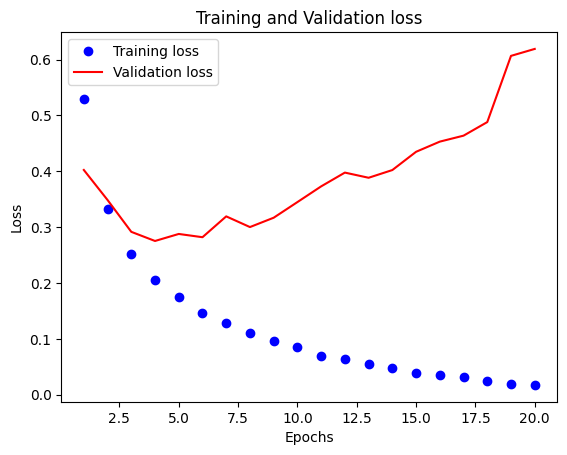

In [280]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

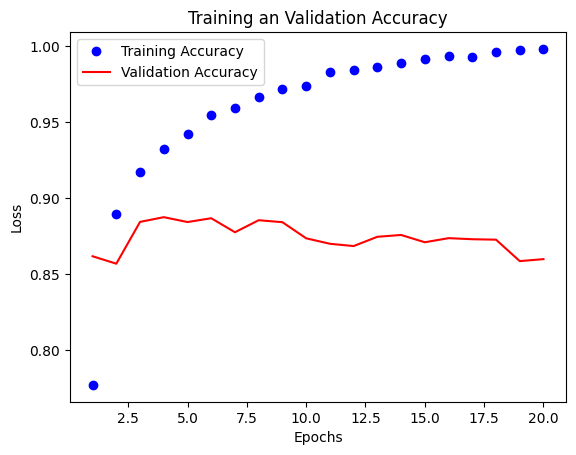

In [281]:
# clear plot
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training an Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [282]:
results = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


In [283]:
# print(results)
print(results.shape)
print(len(results))

(25000, 1)
25000


In [284]:
print(x_test[0].shape)
print(results[0])
print(y_test[0])

(10000,)
[0.05584808]
0.0
